In [32]:
!pip install pdf2image #Converts pdf file to images
!pip install pytesseract #OCR on images
!pip install opencv-python #Library for image processing and computer vision tasks
!pip install numpy #Supports large multi dimensional arrays & matrices
!pip install pandas #pandas library provides easy to use data structures
!pip install Pillow #A python imaging library fork that adds image processing capabilities to python interpreter
!pip install fastapi[all] #FastAPI is a web framework for building APIs with python
!apt-get install -y poppler-utils #Poppler utilities, a suite of command-line tools to work with PDF files
!apt-get install -y poppler-utils tesseract-ocr #Install tesseract ocr, to convert images of text into actual text

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [62]:
#Poppler includes pdftoppm and pdftocairo, which are used by pdf2image to convert PDF pages into images.
from pdf2image import convert_from_path
poppler_path_i = '/usr/bin/'
pages = convert_from_path(r'/content/pre_1.pdf', poppler_path = poppler_path_i)

In [63]:
pages

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200>]

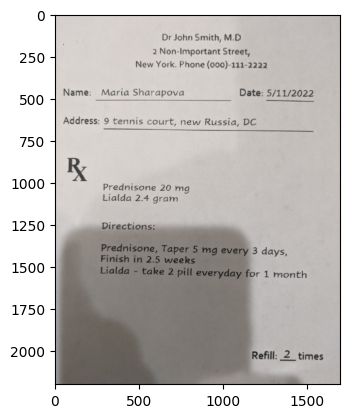

In [64]:
for i, image in enumerate(pages): #Iterate over the pages list
    image.save(f'page_{i+1}.png', 'PNG')

# Display images
import matplotlib.pyplot as plt

for image in pages:
    plt.imshow(image)
    plt.show()

In [65]:
import cv2
from PIL import Image
import numpy as np
''' Image preprocessing here includes, converting to gray scale, resizing image, and implementing adaptive thresholding so that, the shadowed part can be recognized'''
def image_preprocess(img):
  gray = cv2.cvtColor(np.array(image),cv2.COLOR_BGR2GRAY) #converted to gray scale image
  resized_image = cv2.resize(gray, None, fx = 1.5, fy =1.5, interpolation=cv2.INTER_LINEAR) #Pixels were stretched, leads to new cells, new pixels are made to middle(0-255,i.e., 127)
  #Adaptive Thresholding
  # ADAPTIVE_THRESH_GAUSSIAN_C means the threshold value is calculated using a Gaussian-weighted sum of the pixel values in the neighborhood.
  #61 - The size of the neighborhood area used to calculate the threshold value for each pixel. This is a window size of 61x61 pixels.
  processed_img = cv2.adaptiveThreshold(
    resized_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    61,
    11)
  return processed_img




In [66]:
fin_img = image_preprocess(pages[0])

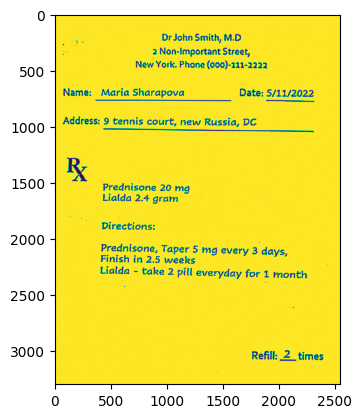

In [67]:
#Image.fromarray(fin_img).show()
plt.imshow(fin_img)

In [68]:
tesseract_path = '/usr/bin/tesseract'

In [69]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = tesseract_path #Path to tesseract executable is set
text = pytesseract.image_to_string(fin_img)
print(f'Text from page {i+1}:\n{text}\n')

# Save the extracted text to a file
with open(f'page_{i+1}.txt', 'w') as text_file:
  text_file.write(text)

Text from page 1:
Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-121-2222

Name: Marta Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

 

Prednisone 20 mg
Lialda 2.4 gram

Directions:

Prednisone, Taper 5 mg every 3 days,
Finish in 2.5 weeks a
Lialda - take 2 pill everyday for 1 month

Refill: 2 times


